In [11]:
from math import sqrt
from qiskit import *
import qiskit.aqua as qa
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

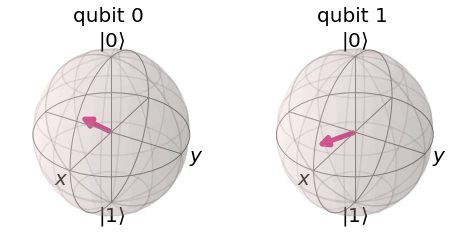

In [12]:
''' 
custom quantum state
alpha_00 = 0.7211, alpha_10 = 0.35643, alpha_01 = 0.533, alpha_11 = 0.26349
(alpha_00)^2 + (alpha_10)^2 + (alpha_01)^2 + (alpha_11)^2 = 1
'''
custom_qubit_state = [0.7211, 0.35643, 0.533, 0.26349]

#plot qubit on bloch sphere
plot_bloch_multivector(custom_qubit_state)

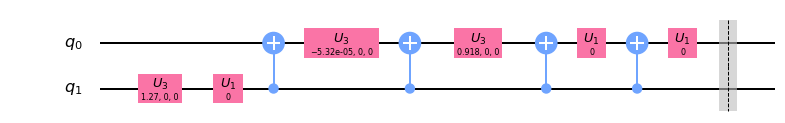

In [13]:
custom = qa.components.initial_states.Custom(num_qubits=2, state_vector=custom_qubit_state)
custom_qubit_circuit = custom.construct_circuit()

custom_qubit_circuit.barrier()

custom_qubit_circuit.draw(output='mpl')

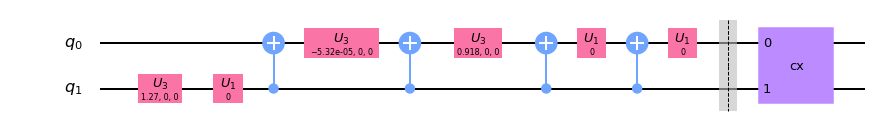

In [15]:
cx = Operator([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, -1/sqrt(2), -1/sqrt(2)],
    [0, 0, -1/sqrt(2), 1/sqrt(2)]
])

custom_qubit_circuit.unitary(cx, [0, 1], label='cx')
custom_qubit_circuit.draw(output='mpl')

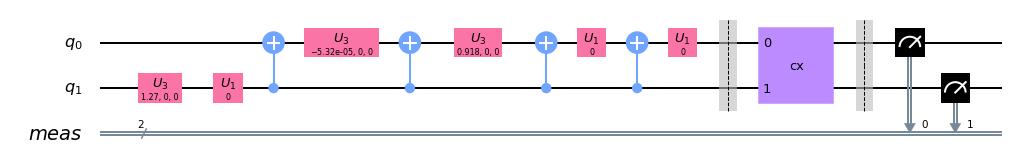

In [16]:
custom_qubit_circuit.measure_all()
custom_qubit_circuit.draw(output='mpl')

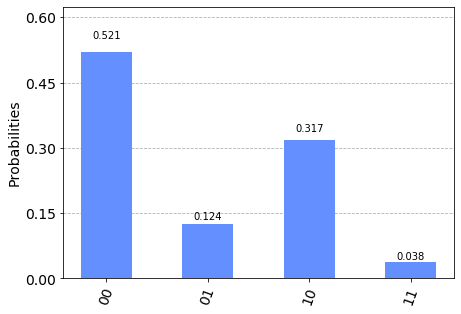

In [17]:
#measurement on local simulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(custom_qubit_circuit, backend=simulator, shots=1024).result()
'''
(alpha_00)^2 ~ 0.52
(alpha_10)^2 ~ 0.127
(alpha_01)^2 ~ 0.284
(alpha_11)^2 ~ 0.067
'''
plot_histogram(result.get_counts(custom_qubit_circuit))

In [18]:
#measurement on IBMQ backend
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
provider = IBMQ.get_provider('ibm-q')
ibmq_backend = provider.get_backend('ibmq_16_melbourne')

In [ ]:
job = execute(custom_qubit_circuit, backend=ibmq_backend)

job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(custom_qubit_circuit))

Job Status: job is queued (525)   